In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score, precision_score, plot_roc_curve
import numpy as np

In [18]:
credito = pd.DataFrame(
    {
        "income": [0.5, 0.8, 4.7, 3.7, 2.5, 1.2, 1.6, 4.2, 4.8], 
        "passed": [0, 0, 1, 1, 1, 0, 0, 1, 1]
    }
)

In [19]:
credito

,income,passed
0,0.5,0
1,0.8,0
2,4.7,1
3,3.7,1
4,2.5,1
5,1.2,0
6,1.6,0
7,4.2,1
8,4.8,1


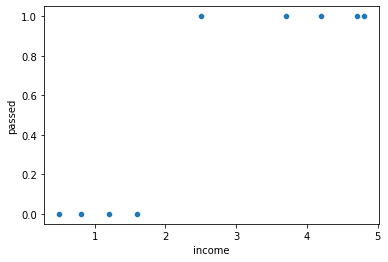

In [20]:
# visualizing the dataset
_ = sns.scatterplot(x="income", y="passed", data=credito)
plt.show()

In [37]:
# reshapping the data first
income = credito["income"].values.reshape(-1, 1)  # Xmatrix: 9x1 
passed = credito["passed"].values.reshape(-1, 1)  # Ymatrix: 9x1

# running a linear regression model
lr = LogisticRegression().fit(income, passed)
lr

/home/luba/.local/share/virtualenvs/TeraBootCamp-OuZDK9Fm/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

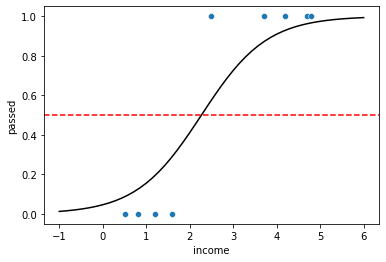

In [54]:
X = np.linspace(-1, 6)  #  mass of data to predict
probs = lr.predict_proba(X.reshape(-1, 1)).T[1]  # T[0] probability of beeing 0, T[1] prob of beeing 1

ax = sns.scatterplot(x="income", y="passed", data=credito)
_ = sns.lineplot(x=X, y=probs, color="black")
ax.axhline(0.5, ls="--", color="red")
plt.show()

In [47]:
X.reshape(-1, 1).shape

(50, 1)

# Trying on Breast Cancer Wisconsin

In [61]:
# passing a dataset scikit obj to a dataframe
def scidataset_to_dataframe(dataset):
    """dataset is a data scikit object"""
    variables = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    target = pd.Series(dataset.target, name="diagnostico")

    df = pd.concat([variables, target], axis=1)

    return df

In [62]:
dataset = load_breast_cancer()
breast_cancer_df = scidataset_to_dataframe(dataset)
breast_cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnostico'],
      dtype='object')

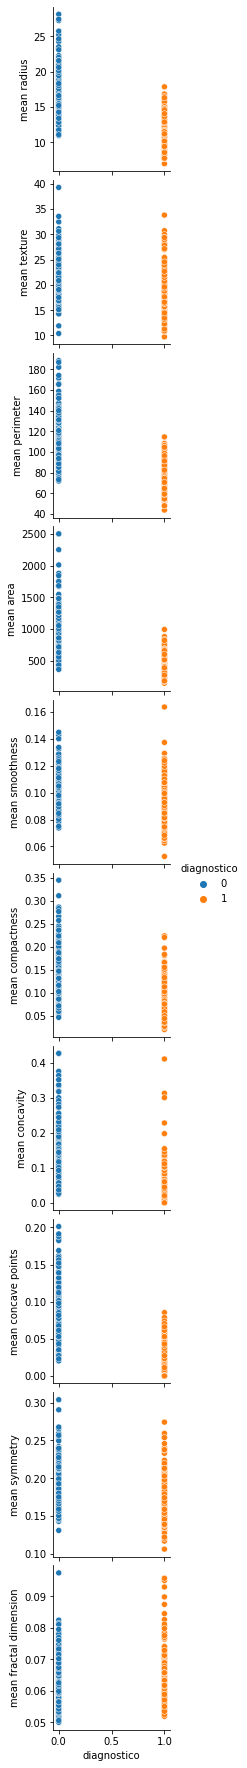

In [64]:
# rapid eda
_ = sns.pairplot(
    x_vars=["diagnostico"],
    y_vars=[
        "mean radius",
        "mean texture",
        "mean perimeter",
        "mean area",
        "mean smoothness",
        "mean compactness",
        "mean concavity",
        "mean concave points",
        "mean symmetry",
        "mean fractal dimension",
    ],
    hue="diagnostico", 
    data=breast_cancer_df
)


In [66]:
# looking for collinearity
breast_cancer_df[["diagnostico", 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']].corr()


,diagnostico,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
diagnostico,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,0.012838
mean radius,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
mean texture,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
mean perimeter,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
mean area,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
mean smoothness,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
mean compactness,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
mean concavity,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
mean concave points,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
mean symmetry,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


Some of the means have a alto correlation between each others, so we may need to choose between those variables, or apply some PCA analysis to combine the effect of it.

In [68]:
# lets separate in train and test
(
    breast_cancer_train,
    breast_cancer_test,
    breast_cancer_target_train,
    breast_cancer_target_test,
) = train_test_split(
    breast_cancer_df[["mean radius", "mean texture", "mean symmetry"]],
    breast_cancer_df[["diagnostico"]], 
    test_size=0.25,  # percent separate for test
    random_state=101
)


In [72]:
# train our model
lr = LogisticRegression().fit(breast_cancer_train, breast_cancer_target_train)
diagnostic_pred_lr = lr.predict(breast_cancer_test)
diagnostic_pred_lr

/home/luba/.local/share/virtualenvs/TeraBootCamp-OuZDK9Fm/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [70]:
breast_cancer_target_train

,diagnostico
464,1
454,1
447,1
363,1
241,1
...,...
552,1
393,0
75,0
337,0


/home/luba/.local/share/virtualenvs/TeraBootCamp-OuZDK9Fm/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


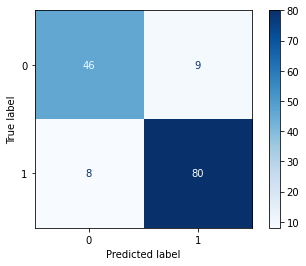

In [75]:
# confusion matrix
_ = plot_confusion_matrix(lr, breast_cancer_test, breast_cancer_target_test, cmap="Blues")
plt.show()

In [77]:
print(
    "Acurácia: {}\nPrecision: {}\nRecall: {}".format(
        accuracy_score(breast_cancer_target_test, diagnostic_pred_lr),
        precision_score(breast_cancer_target_test, diagnostic_pred_lr), 
        recall_score(breast_cancer_target_test, diagnostic_pred_lr)
    )
)

Acurácia: 0.8811188811188811
Precision: 0.898876404494382
Recall: 0.9090909090909091


/home/luba/.local/share/virtualenvs/TeraBootCamp-OuZDK9Fm/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


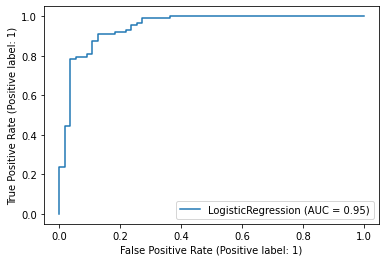

In [80]:
_ = plot_roc_curve(lr, breast_cancer_test, breast_cancer_target_test)

# Others classification algos